In [136]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage import io
from skimage import transform, filters, color

In [138]:
def invert(img):
    """
    Inverts an grayscale image.
    """
    
    imgInvert = (255 - img)
    return imgInvert

In [316]:
def removeDoubleDetects(rectangles):
    """
    Removes all rectangles that are too simillar to be different cards.
    
    Compares the center positions of all the rectangles and removes
    the ones with distances are below a threshold.
    
    """
    
    # The threshold that is the minimum distance between
    DISTANCE_THRESHOLD = 50
    
    # The center positions of all the rectangles that have not been removed.
    centers = []
    
    # The array of rectangles that will be returned
    returnRectangles = []
    
    for rectangle in rectangles:
        # Get the center of the rectangle
        x, y, width, height = cv2.boundingRect(rectangle)
        center = np.array([x - width, y- height])
        
        # Indicates whether there is a rectangle that is too simillar.
        double = False
        
        # Check for all known centers, if the new one is too simillar.
        for cent in centers:
            dist = np.linalg.norm(center - cent)
            
            if(dist < DISTANCE_THRESHOLD):
                double = True
        
        # If the rectangle is not a double detection add its center to the array of
        # known centers and the rectangle to the array of rectangles that will be returned
        if(not double):
            centers.append(center)
            returnRectangles.append(rectangle)
            
    return returnRectangles

In [384]:
def isMagicCard(approx):
    """
    Decides whether an approximate contour is a MTG Card.
    
    Returns:
    -True, if the contour is a MTG Card
    -False, otherwise
    """
    
    
    area = cv2.contourArea(approx)
    
    if(area > 2000 and area < 15000 and len(approx) == 4):
        return True
    else:
        return False


In [307]:
def findAndDrawRectangles(img, imgDraw):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    rects = []

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.1*cv2.arcLength(cnt,True),True)
       
        if(isMagicCard(approx)):
            rects.append(approx)
    
    rects = removeDoubleDetects(rects)
    
    cv2.drawContours(imgDraw, rects, -1, (0,255,0), 3)
    
    io.imshow(imgDraw)
    
    return rects
    

In [144]:
def loadAndPrepareImg(fileName):
    image = cv2.imread(os.getcwd() + "/" + fileName)
    image = image[0:846, 168:1209]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return image

In [305]:
def getImageFromRectangle(img, rect):
    raise NotImplementedError
  


In [390]:
def getCardOrientation(cardImage):
    height, width = cardImage.shape

    tapped = False
    
    if(height > width):
        tapped = True
    
    if(not tapped):
        
        # Ignore the outer regions, so the borders won't affect the outcome
        # TODO !!!
        leftHalf = cardImage[20:height-20, 20:width/2]
        rightHalf = cardImage[20:height-20, width/2:width-20]
        

        countLeft = np.sum(leftHalf)
        countRight = np.sum(rightHalf)
        
        if(countLeft > countRight):
            
            fig = plt.figure(figsize= (20,20))
            io.imshow(leftHalf)
            return 'left'
        else:
            
            fig = plt.figure(figsize= (20,20))
            io.imshow(rightHalf)
            return 'right'
        
        
    

    


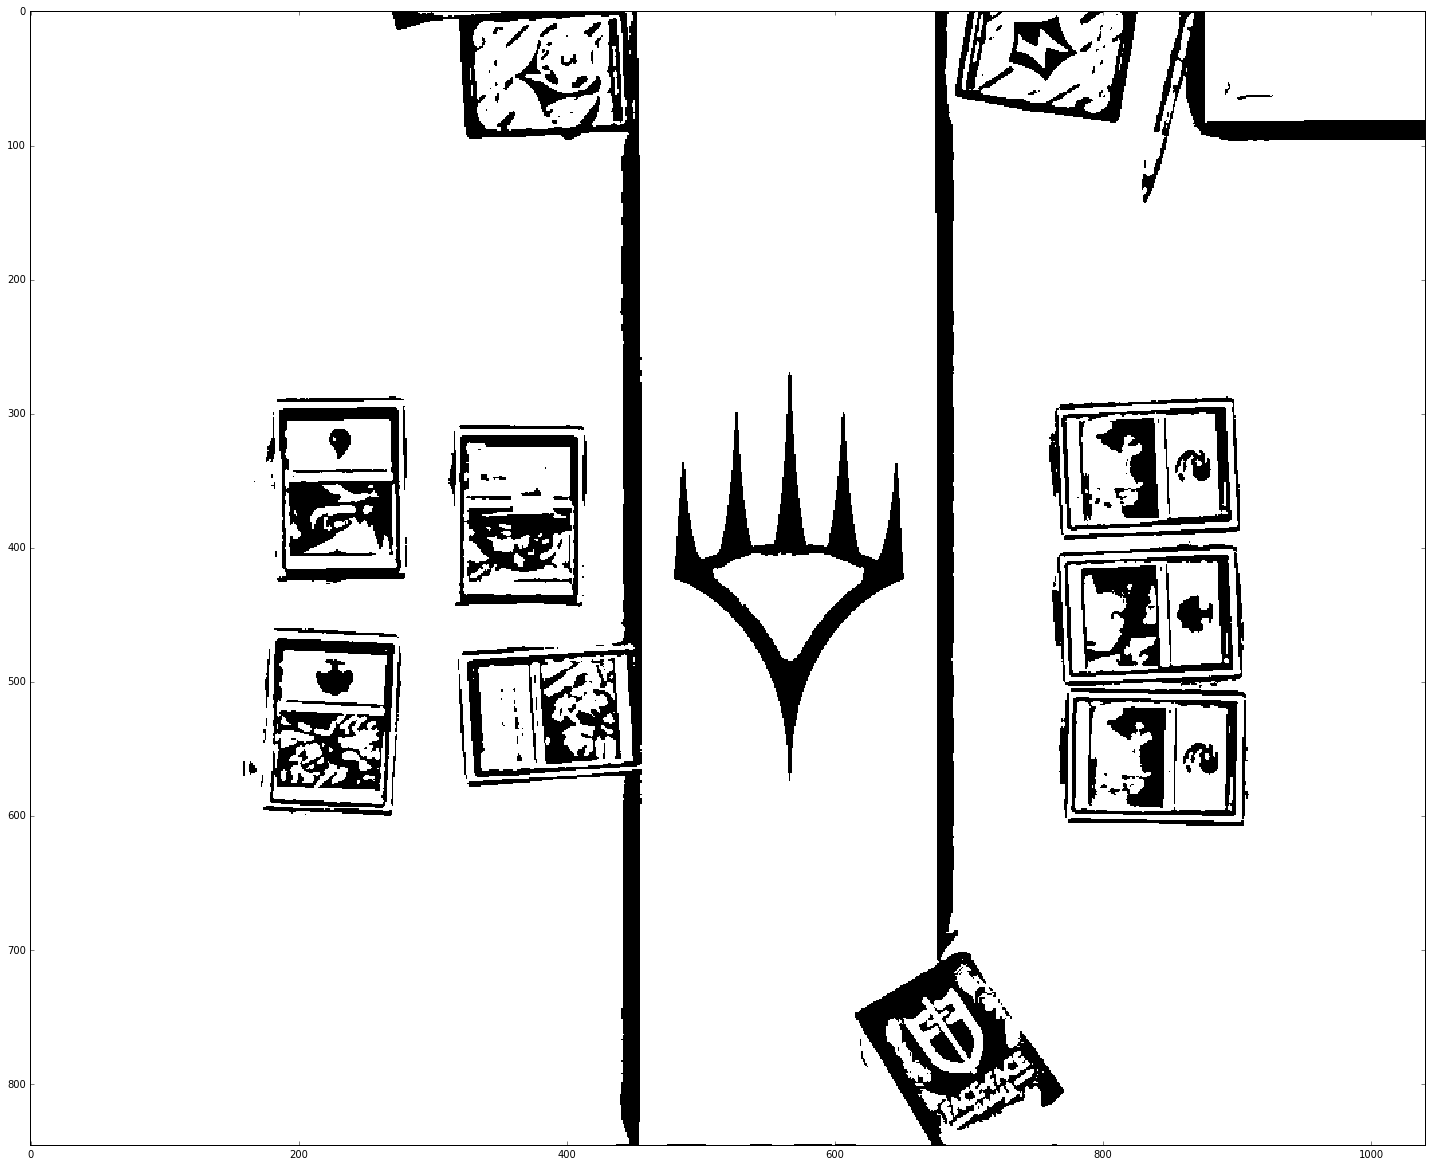

In [392]:
img = cv2.imread(os.getcwd() + "/screenshot7.png")
bg = cv2.imread(os.getcwd() + "/background.png")

img = img[0:846, 168:1209]

imgColor = img
imgColor2 = imgColor

kernel = np.ones((5,5),np.uint8)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(5,5),0)


#ret, thresh = cv2.threshold(img,90,255,cv2.THRESH_BINARY)
thresh = cv2.adaptiveThreshold(img, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,41, 15)
#ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



#thresh = cv2.Canny(thresh, 100, 200)
#thresh = invert(thresh)

#thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


#thresh = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
#thresh = cv2.dilate(thresh,kernel,iterations = 1)
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


#thresholdImg = inverte(thresh)
#thresholdImg = cv2.morphologyEx(thresholdImg, cv2.MORPH_OPEN, kernel)

#ret,thresh = cv2.threshold(img,127,255,0)



fig = plt.figure(figsize= (20,20)) #create an empty figure to plot into with 20x20 size
io.imshow(thresh)
#io.imshow(imgColor)
#io.show()

#findAndDrawRectangles(thresh, imgColor)


#io.imshow(img)

left
None
left
right


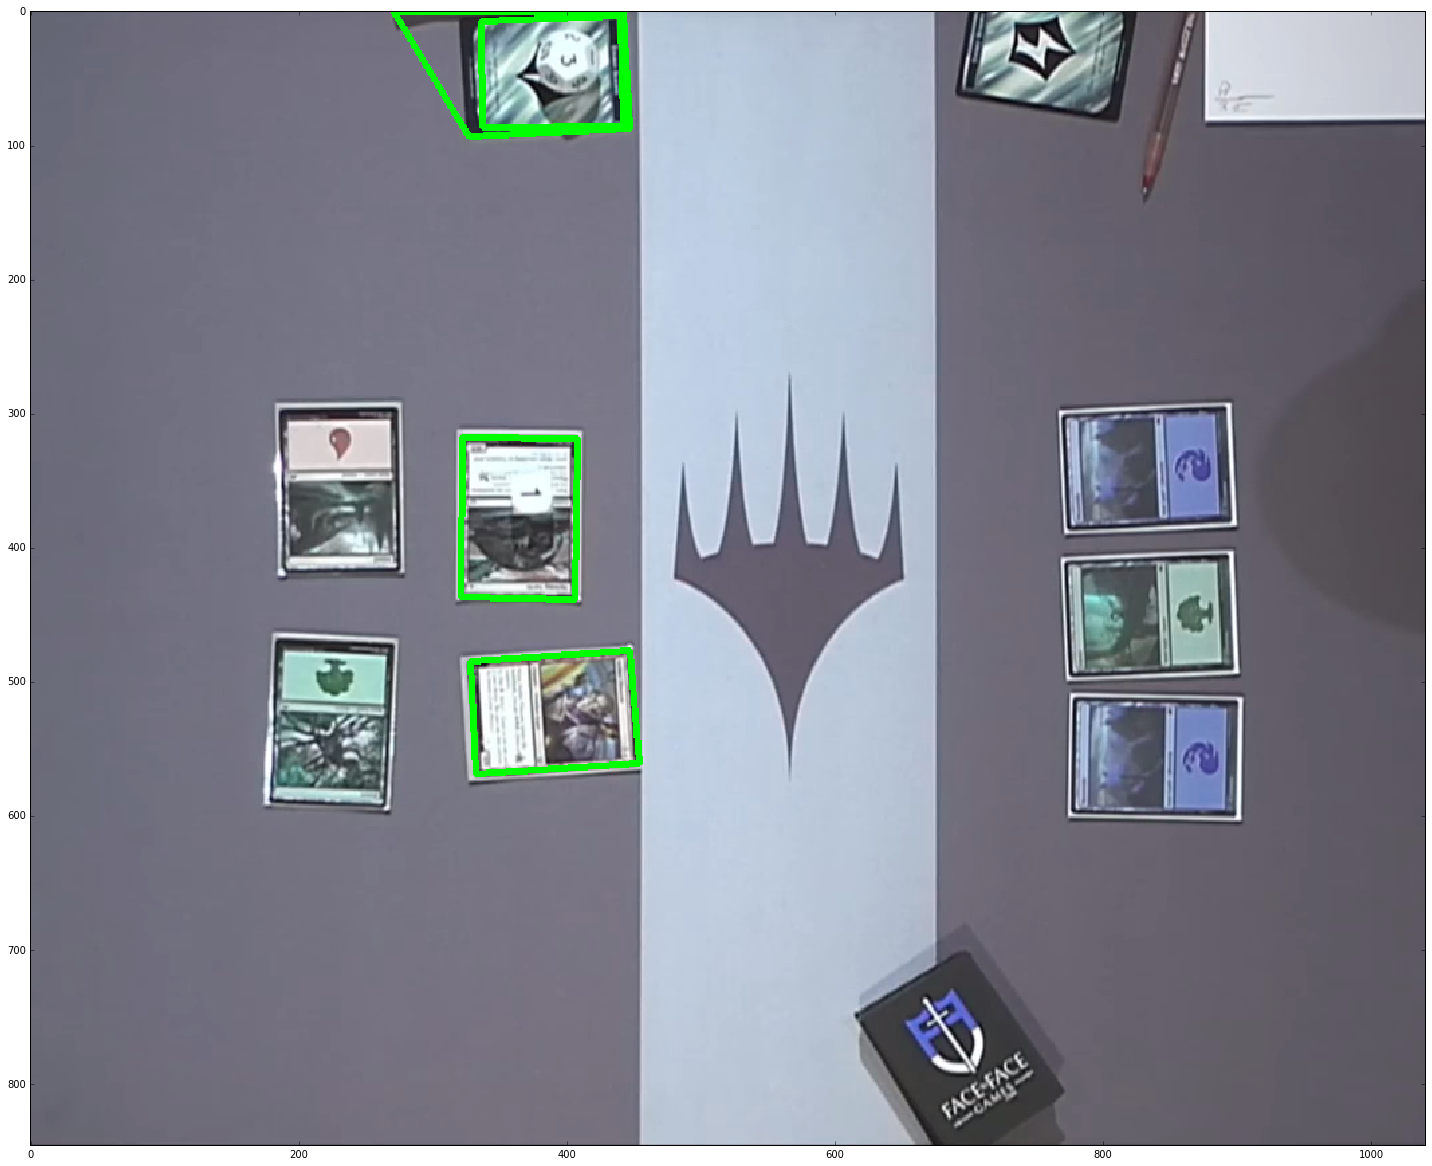

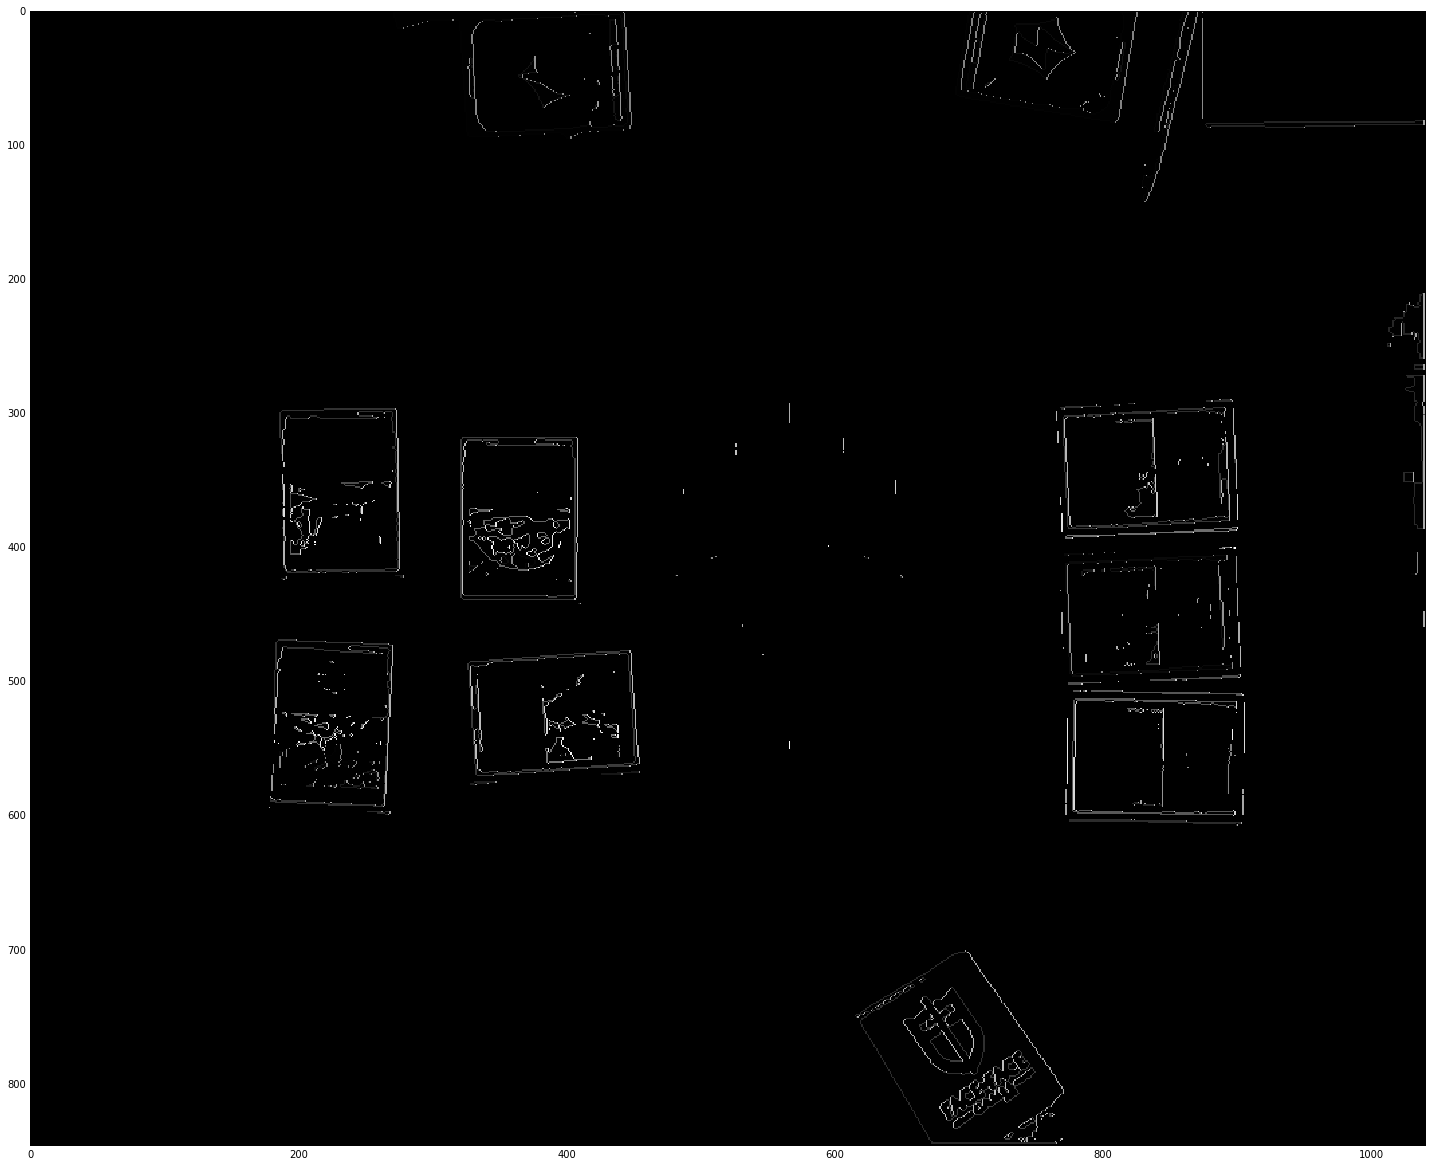

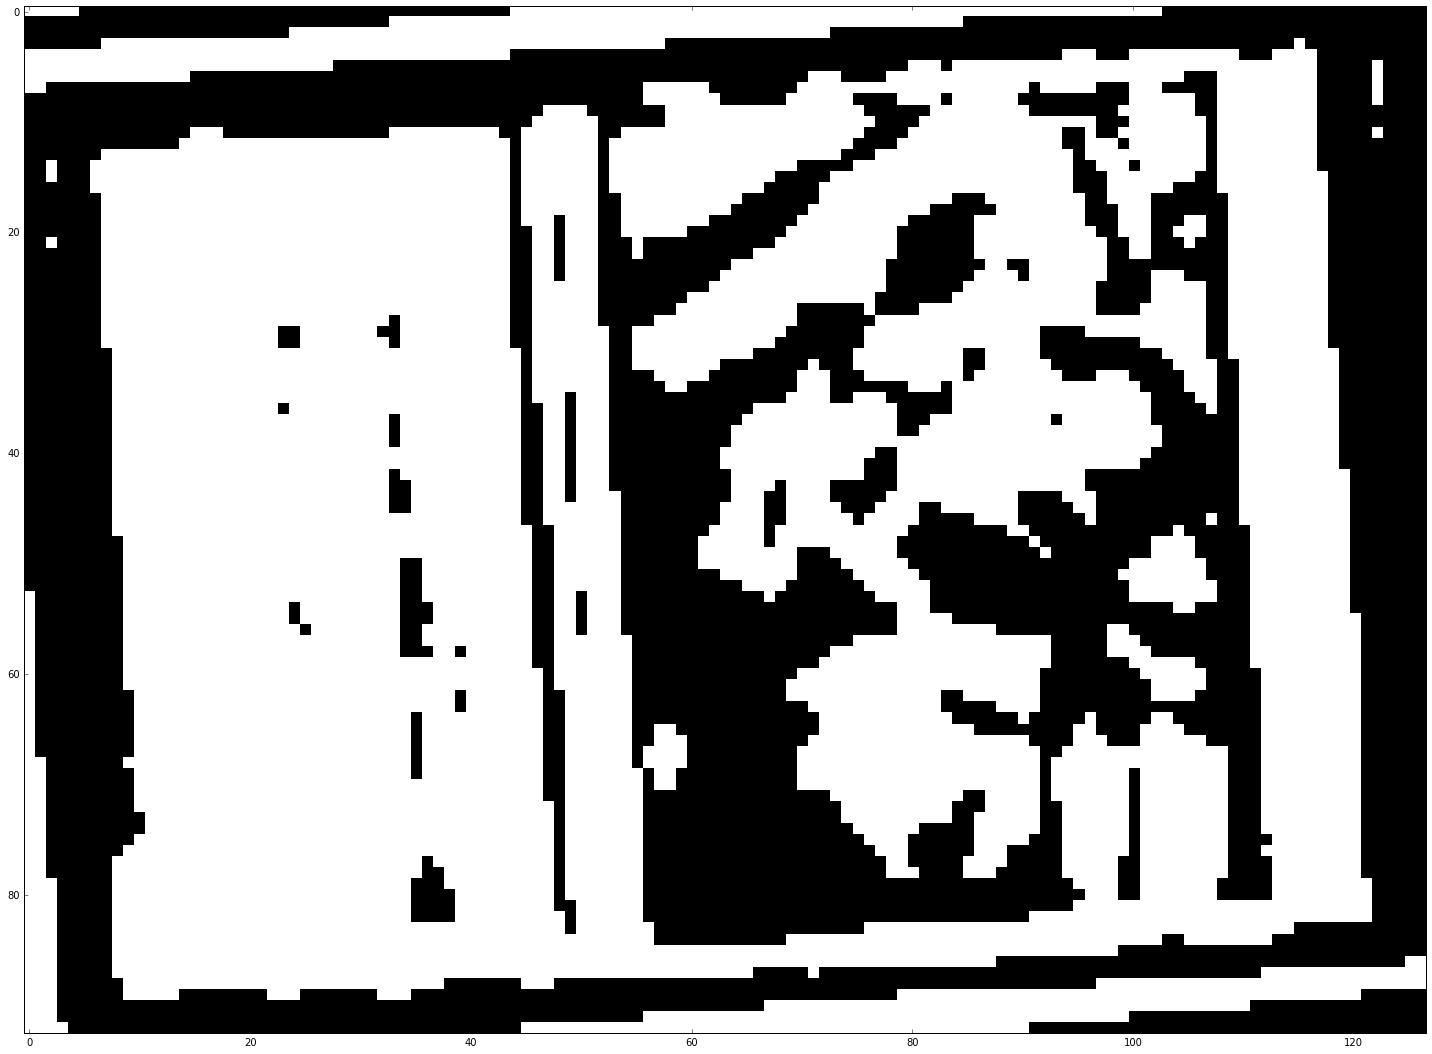

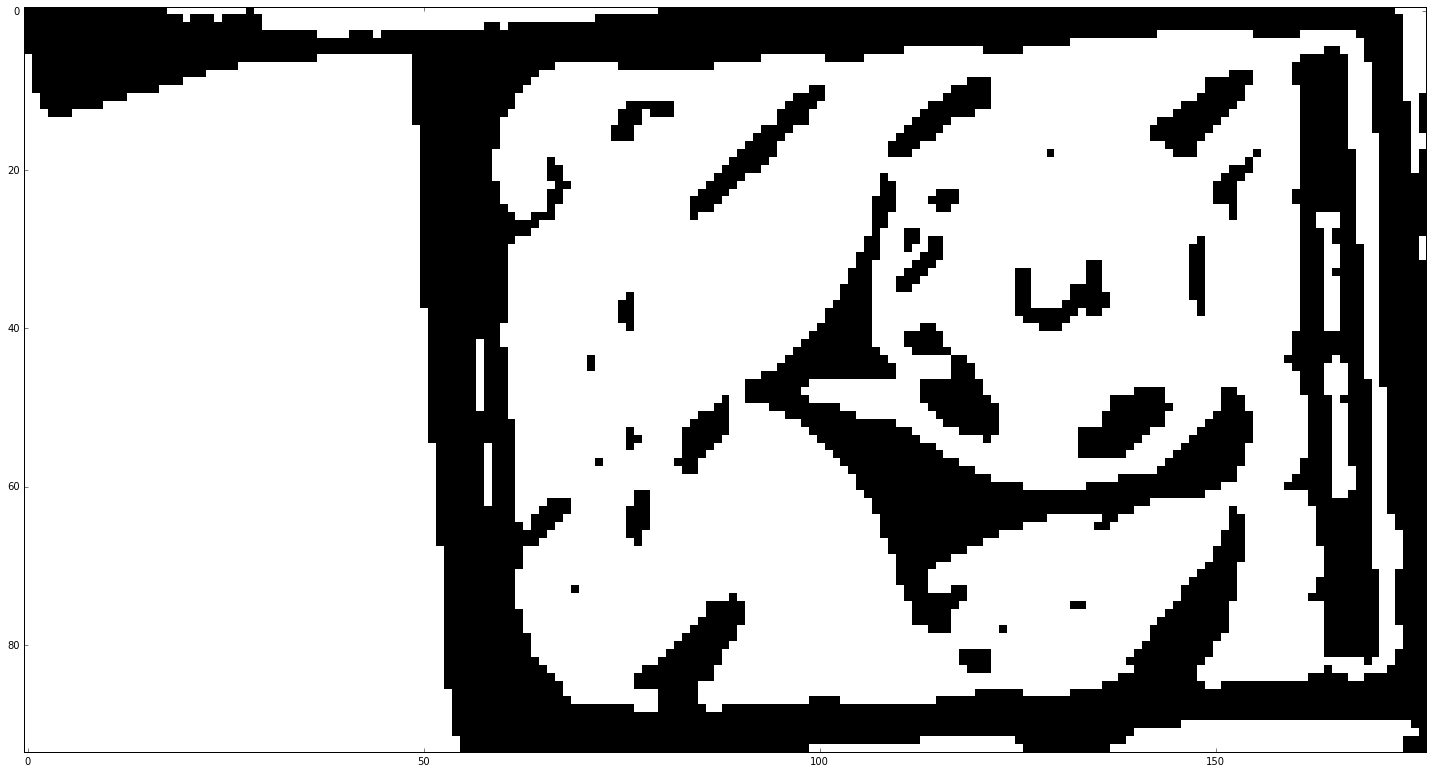

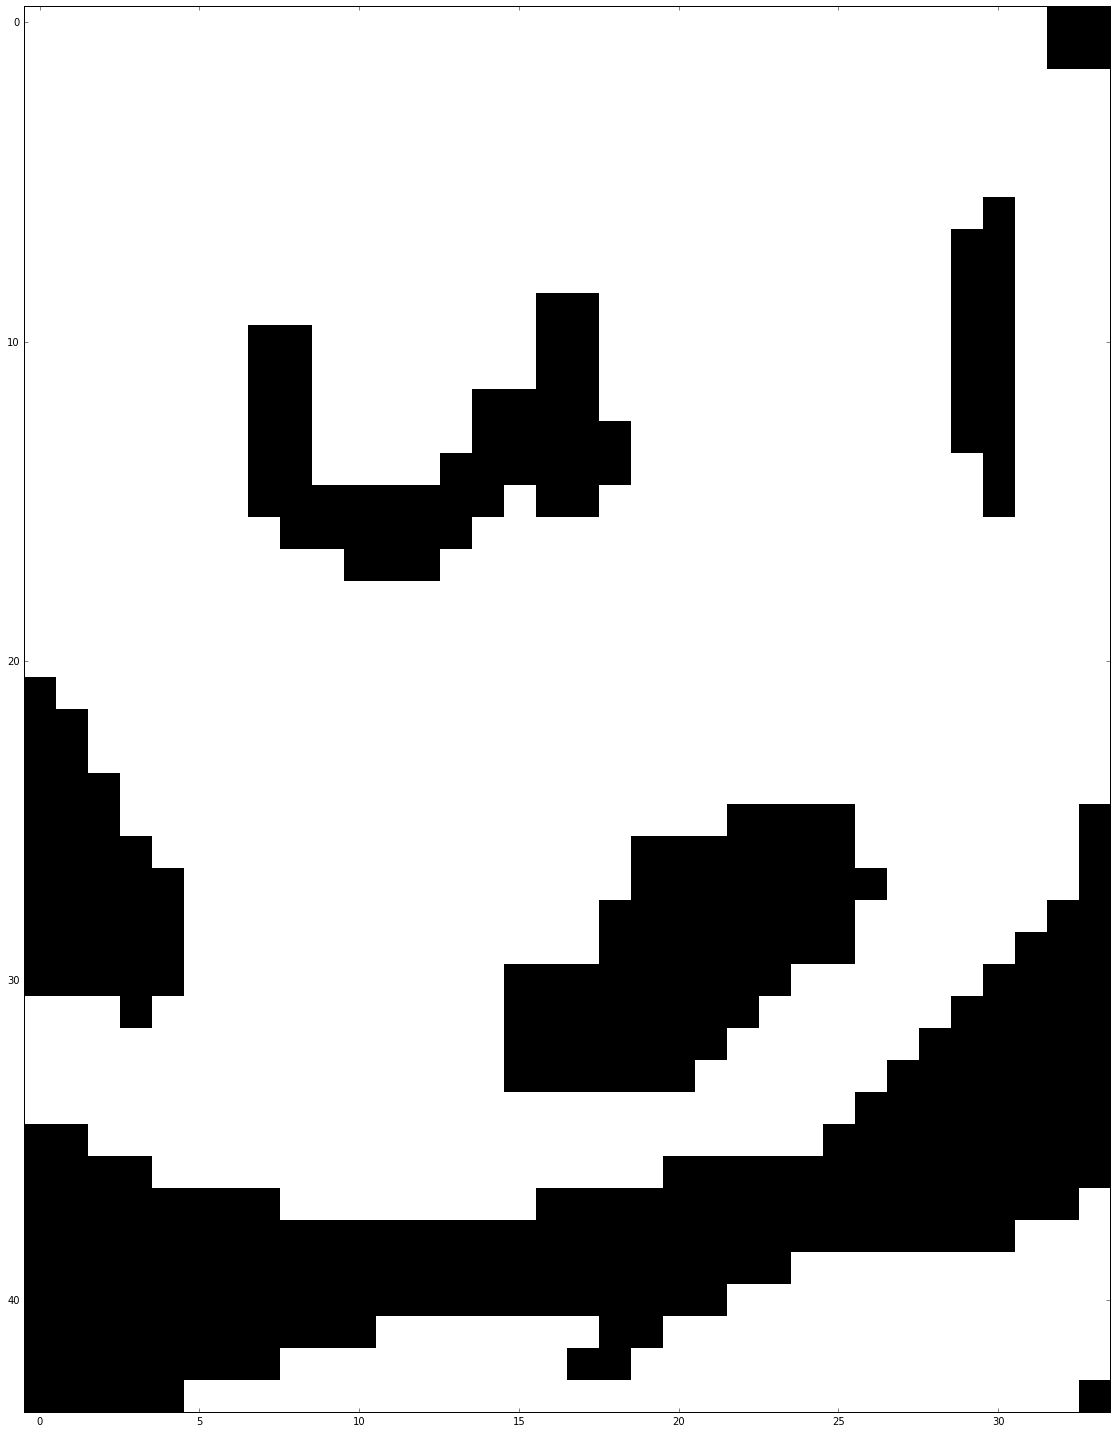

In [397]:
imgC = cv2.imread(os.getcwd() + "/screenshot7.png")
imgC = imgC[0:846, 168:1209]
imgOriginal = imgC

img2 = cv2.cvtColor(imgC, cv2.COLOR_BGR2GRAY)
#img2 = cv2.GaussianBlur(img2,(5,5),0)


average_color_row = np.average(img2, axis=0)
average_color = np.average(average_color_row, axis=0)

mask = img2 - average_color

mask = np.abs(img2)

mask = cv2.inRange(mask, 0,  75)

#mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

#mask =  cv2.dilate(mask,kernel,iterations = 1)


#mask = invert(mask)

fig = plt.figure(figsize= (20,20))
io.imshow(mask)

rects = findAndDrawRectangles(mask, imgC)
 cv2.adaptiveThreshold(img2, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,41, 15)


fig = plt.figure(figsize= (20,20))
io.imshow(mask)

for rect in rects:
    
    box = cv2.boundingRect(rect)
    x, y, width, height = box
    cardImage = img2[y:y+height, x:x+width]

    cardThresh = thresh[y:y+height, x:x+width]
    
    print getCardOrientation(cardThresh)
    
    cardImage = cv2.adaptiveThreshold(cardImage, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,71, 15)
    #cardImage = cv2.Canny(cardImage, 100, 200)
    cardImage = cv2.morphologyEx(cardImage, cv2.MORPH_OPEN, kernel)
    
    
    fig = plt.figure(figsize= (20,20))
    #io.imshow(cardImage)"""

[array([[[ 897,    1]],
 
        [[ 893,   99]],
 
        [[1039,  103]],
 
        [[1039,    2]]], dtype=int32), array([[[591, 663]],
 
        [[592, 807]],
 
        [[501, 815]],
 
        [[491, 672]]], dtype=int32), array([[[336, 591]],
 
        [[468, 607]],
 
        [[471, 703]],
 
        [[342, 707]]], dtype=int32), array([[[446, 334]],
 
        [[405, 340]],
 
        [[404, 409]],
 
        [[445, 410]]], dtype=int32), array([[[806, 203]],
 
        [[938, 207]],
 
        [[935, 296]],
 
        [[804, 294]]], dtype=int32), array([[[639,  79]],
 
        [[766,  77]],
 
        [[765, 171]],
 
        [[637, 169]]], dtype=int32)]

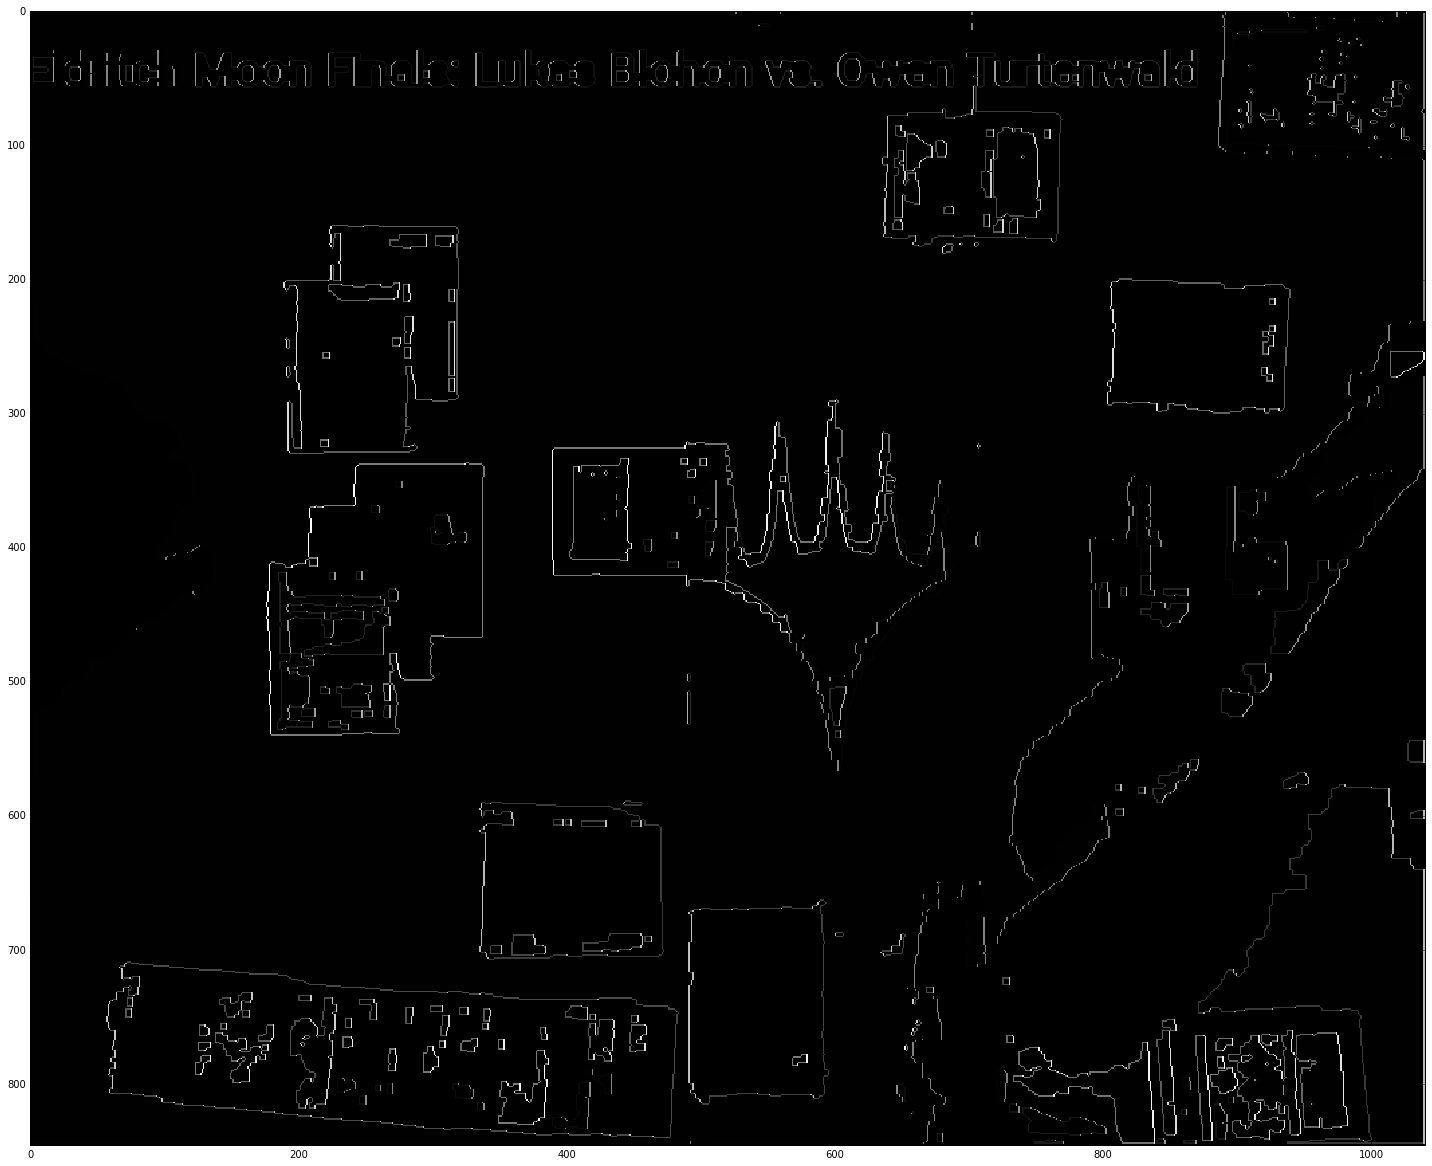

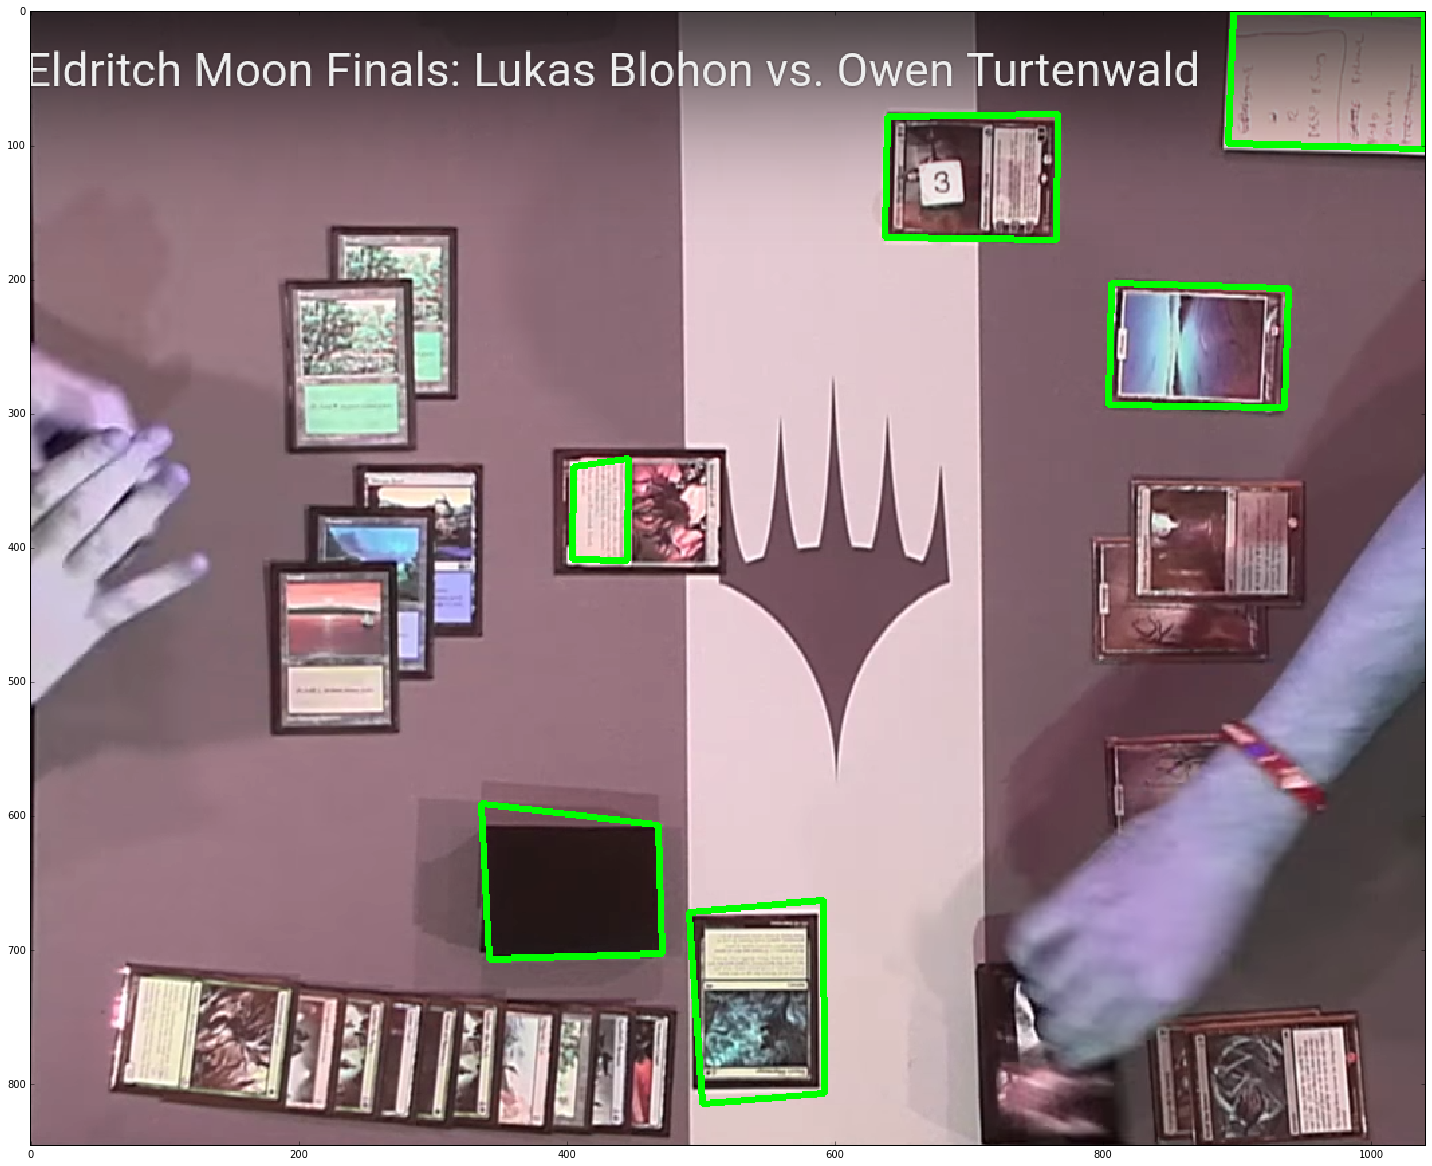

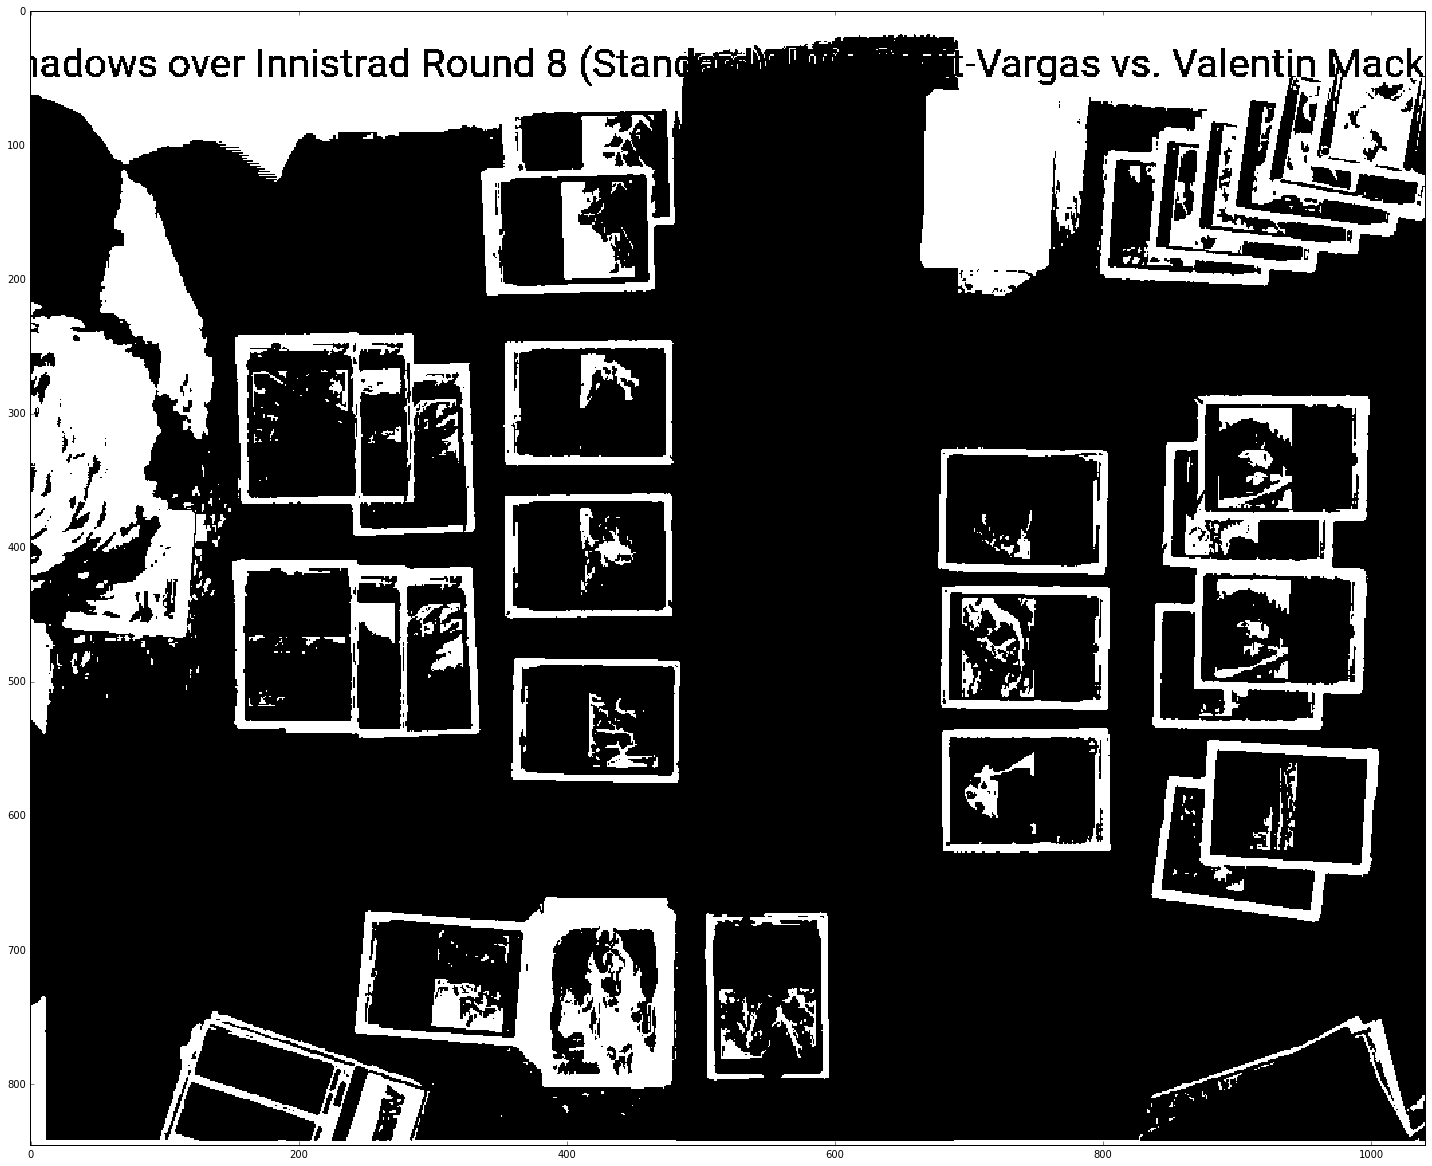

In [418]:
i = loadAndPrepareImg("screenshot5.png")


lower = np.array([0, 0, 0])
upper = np.array([90, 90, 90])

m = cv2.inRange(i, lower, upper)

m = cv2.cvtColor(m, cv2.COLOR_GRAY2RGB)

fig = plt.figure(figsize= (20,20))
io.imshow(m)

In [406]:
m.shape

(846, 1041)